## Experiment 5
## Segment a customer dataset based on the buying behaviour of customers using K- means/Hierarchical clustering.

**K-Means Clustering:**

- **Objective**: Partition data into 'k' clusters to minimize the sum of squared distances (Euclidean distance) from data points to their cluster center.

- **Algorithm**:
  1. Initialize 'k' cluster centers randomly or using some heuristic.
  2. Assign each data point to the nearest cluster center.
  3. Recalculate the cluster centers as the mean of data points in each cluster.
  4. Repeat steps 2 and 3 until convergence (centers no longer change significantly) or for a fixed number of iterations.

- **Formula** (Euclidean Distance):
  - The distance between a data point 'x' and a cluster center 'c' is calculated as:
    - ` d(x, c) = sqrt(sum_{i=1}^{n} (x_i - c_i)^2) `
     <br> where:
    - `(d(x, c))` is the distance between point 'x' and center 'c'.
    - `(x_i)` and `(c_i)` are the coordinates of 'x' and 'c' in the 'i'-th dimension.
    - 'n' is the number of dimensions.

- **Initialization Methods**: Common methods include random initialization and K-Means++ which aims for more even cluster initialization.

- **Choosing 'k'**: The number of clusters 'k' is typically chosen using methods like the Elbow Method or the Silhouette Score.

- **Convergence**: K-Means may converge to a local minimum. Running the algorithm multiple times with different initializations can mitigate this issue.

- **Applications**: Used in various fields, including image compression, customer segmentation, and anomaly detection.

- **Strengths**:
  - Simplicity and efficiency.
  - Works well with large datasets.
  - Scalable to high dimensions.

- **Limitations**:
  - Sensitive to initializations.
  - Assumes clusters are spherical and equally sized.
  - May not perform well with non-globular clusters or varying cluster densities.

- **Variants**: K-Means++, Mini-Batch K-Means, and Hierarchical K-Means are variations of the algorithm.

In [2]:
# Importing Required Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading csv file
df = pd.read_csv("/content/Mall_Customers.csv")

# Mapping Numerical Values
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

# Printing Dataset
print("Dataframe is:\n")
print(df)

Dataframe is:

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       0   19                  15                      39
1             2       0   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
4             5       1   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       1   35                 120                      79
196         197       1   45                 126                      28
197         198       0   32                 126                      74
198         199       0   32                 137                      18
199         200       0   30                 137                      83

[200 rows x 5 columns]


In [ ]:
# Seeing the Columns of Dataset
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Explanation Of The Code

The provided code is an implementation of the k-means clustering algorithm in Python using NumPy. Here's a breakdown of the code:

```python
import numpy as np

def k_means_clustering(data, k, max_iterations=100):
    # Step 1: Initialize centroids randomly
    centroids = data[np.random.choice(len(data), k, replace=False)]

    # Iterate until convergence or maximum iterations
    for _ in range(max_iterations):
        # Step 2: Calculate distances from each point to centroids
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

        # Step 3: Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Step 4: Update centroids based on mean of assigned points
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Step 5: Check for convergence
        if np.all(centroids == new_centroids):
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    # Return final labels and centroids
    return labels, centroids
```

Explanation:

1. **Initialization of Centroids:** The algorithm starts by randomly selecting `k` data points as the initial centroids.

2. **Iterations:** The main loop runs for a maximum number of iterations (`max_iterations`) or until convergence.

3. **Calculate Distances:** It computes the Euclidean distances between each data point and all centroids.

4. **Assign Labels:** Each data point is assigned to the cluster associated with the nearest centroid.

5. **Update Centroids:** The centroids are updated by calculating the mean of the data points assigned to each cluster.

6. **Convergence Check:** The algorithm checks if the centroids have changed. If not, the algorithm has converged, and the loop is terminated.

7. **Return:** The function returns the final cluster labels and centroids.

Note: The NumPy functions, such as `np.random.choice`, `np.linalg.norm`, and array slicing, are used to efficiently implement the algorithm. Make sure to have NumPy installed (`import numpy as np`). Additionally, it's common to scale or normalize your data before applying k-means to ensure meaningful cluster assignments.

## **Numpy Functions Used**

1. **`np.random.choice(len(data), k, replace=False)`**:
   - This function randomly selects `k` unique indices from the range [0, len(data)).
   - `len(data)` is the length of the data array, and `replace=False` ensures that the selected indices are unique, simulating the random selection of initial centroids.

2. **`np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)`**:
   - `np.linalg.norm` is used to calculate the Euclidean norm (distance) between two points.
   - `data[:, np.newaxis]` creates a new axis to broadcast the subtraction across all combinations of data points and centroids.
   - `data[:, np.newaxis] - centroids` computes the differences between each data point and each centroid.
   - `axis=2` specifies that the norm should be calculated along the axis representing the different centroids.

3. **`np.argmin(distances, axis=1)`**:
   - `np.argmin` returns the indices of the minimum values along a specified axis.
   - `axis=1` indicates that the minimum values should be found along the axis corresponding to different centroids.
   - This is used to assign each data point to the cluster with the nearest centroid.

4. **`np.array([data[labels == i].mean(axis=0) for i in range(k)])`**:
   - This line creates a new array containing the mean of the data points assigned to each cluster.
   - It uses a list comprehension to iterate over each cluster (`i`) and calculates the mean along `axis=0` (columns) for the data points assigned to that cluster.

5. **`np.all(centroids == new_centroids)`**:
   - `np.all` checks if all elements in the array are equal.
   - This is used to determine if the centroids have changed. If they haven't changed, the algorithm has converged, and the loop can be terminated.

These NumPy functions are crucial for the efficiency and simplicity of the k-means algorithm implementation. NumPy allows for concise and vectorized operations, making the code more readable and computationally efficient.

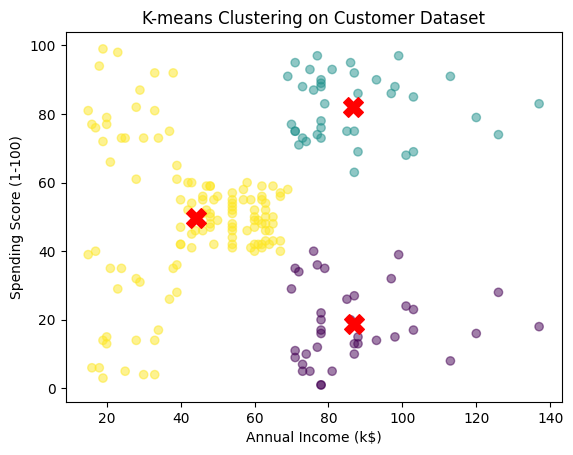

In [3]:
# Defining Function for K means clustering
def k_means_clustering(data, k, max_iterations=100):

    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iterations):

        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# For Plotting Clusters
def plot_clusters(data, labels, centroids):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
    plt.title("K-means Clustering on Customer Dataset")
    plt.ylabel("Spending Score (1-100)")
    plt.xlabel("Annual Income (k$)")
    plt.show()

# Main Function
def main():

    # 'Age', 'Spending Score (1-100)', 'Gender' and 'Annual Income (k$)' are the columns to use
    data = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Gender', 'Age']].values

    # Number of clusters
    k = 3

    # Perform K-means clustering
    labels, centroids = k_means_clustering(data, k)

    # Plot the clusters
    plot_clusters(data, labels, centroids)

if __name__ == "__main__":
    main()

## Experiment 6
## Dimensionality reduction of any CSV/image dataset using Principal Component Analysis.

Certainly! If you are creating a README file to describe Principal Component Analysis (PCA), you might want to provide an explanation of what PCA is, its applications, and perhaps how to use it in a data analysis context. Here's a template for a PCA README file:

---

# Principal Component Analysis (PCA)

## Overview

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data analysis and machine learning. It helps transform high-dimensional data into a lower-dimensional space while retaining as much of the original variability as possible. By identifying the principal components, which are linear combinations of the original features, PCA can simplify complex datasets and facilitate data exploration.

## Key Concepts

- **Principal Components:** These are the new axes in the transformed space. They are ordered by the amount of variance they capture, with the first principal component capturing the most variance.

- **Variance:** PCA aims to maximize variance along the principal components. This means that the first few components retain the most important information present in the original data.

- **Eigenvalues and Eigenvectors:** PCA involves the computation of eigenvalues and eigenvectors of the covariance matrix of the original data. The eigenvectors represent the directions of maximum variance, and the corresponding eigenvalues indicate the magnitude of variance along those directions.

## Applications

- **Dimensionality Reduction:** PCA is commonly used to reduce the number of features in a dataset, making it easier to visualize and analyze.

- **Noise Reduction:** By focusing on the principal components with the most significant variance, PCA can help mitigate the impact of noisy features in the data.

- **Data Compression:** PCA can be used for data compression, particularly in scenarios where storage or computational resources are limited.

In [ ]:
# Importing Required Libraries
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Importing Dataset

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")
print("Dataset is:\n")
print(df)

Dataset is:

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sul

## Applying PCA on Dataset

In [ ]:
# Here we are storing pca function in a variable
pca = PCA(n_components = 2)

# Passing Dataframe to function
pca_data = pca.fit(df).transform(df)

print("Transformed Dataset is:\n")
print(pca_data)

Transformed Dataset is:

[[-13.22202658  -2.03192212]
 [ 22.04025471   4.40179054]
 [  7.16536169  -2.50832073]
 ...
 [ -3.43293096  14.27427694]
 [  1.13557385  16.30769238]
 [ -3.87592057   3.13011173]]


## Histogram Plot of Original Dataset

Text(0, 0.5, 'Count of Values')

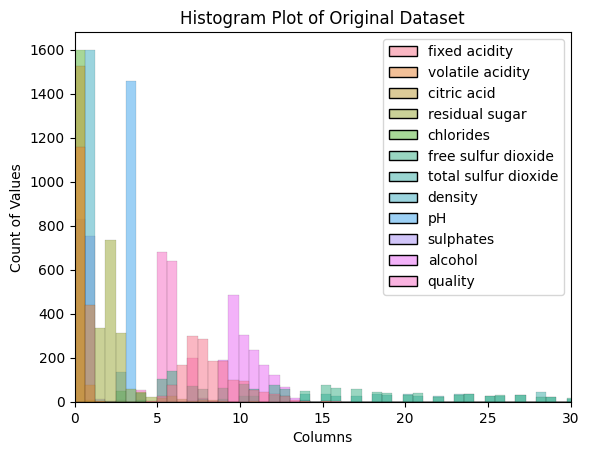

In [ ]:
# Plotting Histogram of Dataset
sns.histplot(df)
# Adding x limit
plt.xlim(0,30)
# Adding title
plt.title("Histogram Plot of Original Dataset")
# Adding Labels
plt.xlabel("Columns")
plt.ylabel("Count of Values")

## Histogram Plot of Transformed Dataset

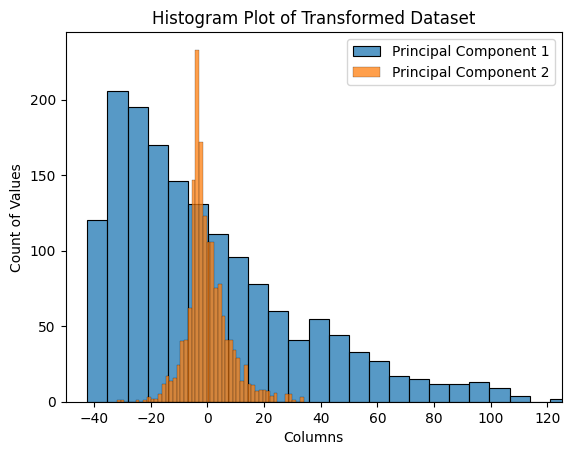

In [ ]:
# Plot histograms for both columns
# In the previous histogram it was showing one additional plot to remove that we will plot both columns separately
# It will also make it easier to recognize
sns.histplot(data=pca_data, x=pca_data[:,0], label="Principal Component 1")
sns.histplot(data=pca_data, x=pca_data[:,1], label="Principal Component 2")

# Adding x limit
plt.xlim(-50,125)

# Adding title
plt.title("Histogram Plot of Transformed Dataset")
# Adding Labels
plt.xlabel("Columns")
plt.ylabel("Count of Values")

# Show legend
plt.legend()

## Experiment 7
## Recognition of MNIST handwritten digits using Artificial Neural Network.


In [ ]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=d68f0777cefdf984a518ef4e04ca271e9b3072acaee8cb338ca48d8a7bba4d7b
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


## Explanation Of The Code

Certainly! This code is an implementation of a simple neural network using the Keras library for the MNIST dataset. Let's go through the code step by step:

### Loading and Preprocessing Data
```python
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select a subset of the data
X_train, y_train = X_train[:80], y_train[:80]
X_test, y_test = X_test[:20], y_test[:20]

# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
```

Explanation:
- The MNIST dataset is loaded, consisting of 28x28 pixel grayscale images of handwritten digits.
- A subset of the data is selected (80 training samples and 20 test samples) for faster execution in this example.
- Images are flattened to 1D arrays (784 elements) and normalized to the range [0, 1].
- Labels are one-hot encoded using `to_categorical`.

### Building the Neural Network Model
```python
# Define the model
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the model
model = baseline_model()
```

Explanation:
- The neural network model is defined using Keras's `Sequential` model.
- It consists of two layers: a dense layer with ReLU activation for the input, and a dense layer with softmax activation for the output.
- The model is compiled with categorical crossentropy loss, the Adam optimizer, and accuracy as the metric.

### Training the Model
```python
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
```

Explanation:
- The model is trained using the training data (`X_train`, `y_train`) and validated on the test data (`X_test`, `y_test`).
- The training is performed for 10 epochs with a batch size of 200.

### Evaluating the Model
```python
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100 - scores[1] * 100))
```

Explanation:
- The trained model is evaluated on the test data, and the final accuracy is printed.

### Model Evaluation Metrics
```python
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", confusion_mtx)

# compute accuracy
acc = accuracy_score(y_true, y_pred_classes)
print("\nAccuracy: %.2f%%" % (acc * 100))

# compute classification report
report = classification_report(y_true, y_pred_classes)
print("\nClassification Report:\n", report)
```

Explanation:
- The model predictions (`y_pred`) are converted from one-hot encoded vectors to class labels.
- Confusion matrix, accuracy, and a classification report are computed using scikit-learn metrics.

This code essentially demonstrates how to build, train, and evaluate a simple neural network for digit classification using the MNIST dataset. It also shows how to use common metrics to assess the performance of the model.

## Specific functions and Arguments

### 1. `to_categorical` function
```python
from tensorflow.keras.utils import to_categorical

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
```

**Explanation:**
- `to_categorical` is a function from the Keras utilities module (`keras.utils`) that converts class vectors (integers) to binary class matrices (one-hot encoded vectors).
- In this case, it's used to convert the integer labels `y_train` and `y_test` into one-hot encoded format. For example, if a digit is represented as `3`, after `to_categorical`, it will be represented as `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.

### 2. `Sequential` model and `Dense` layers
```python
from keras.models import Sequential
from keras.layers import Dense

# Define the model
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
```

**Explanation:**
- `Sequential`: It's the Keras sequential model, allowing you to build models layer by layer in a step-by-step fashion.
- `Dense`: It's a fully connected layer in the neural network. Each neuron in one layer is connected to every neuron in the next layer.
- The first `Dense` layer has `num_pixels` neurons, uses the ReLU activation function, and takes an input of size `num_pixels`. It is initialized with a normal distribution of weights (`kernel_initializer='normal'`).
- The second `Dense` layer has `num_classes` neurons (equal to the number of classes in the output), uses the softmax activation function, and is also initialized with a normal distribution of weights.
- The model is compiled with categorical crossentropy as the loss function, the Adam optimizer (`'adam'`), and accuracy as the metric to monitor during training.

### 3. `model.fit` function
```python
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
```

**Explanation:**
- `model.fit`: This function is used to train the model on the provided training data.
- `X_train` and `y_train` are the training data and labels, respectively.
- `validation_data=(X_test, y_test)`: The validation data on which to evaluate the loss and any model metrics at the end of each epoch.
- `epochs=10`: The number of epochs (passes through the entire dataset) to train the model.
- `batch_size=200`: The number of samples per gradient update. This is the number of training examples utilized in one iteration.
- `verbose=2`: It controls the verbosity during training. `verbose=2` means it will print one line per epoch.

### 4. `model.evaluate` function
```python
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100 - scores[1] * 100))
```

**Explanation:**
- `model.evaluate`: This function is used to evaluate the model on the provided test data.
- `X_test` and `y_test` are the test data and labels, respectively.
- The `scores` variable holds the values of the loss and metrics (in this case, accuracy) on the test data.
- The accuracy is then printed as the baseline error.

### 5. Model Prediction and Evaluation Metrics
```python
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", confusion_mtx)

# compute accuracy
acc = accuracy_score(y_true, y_pred_classes)
print("\nAccuracy: %.2f%%" % (acc * 100))

# compute classification report
report = classification_report(y_true, y_pred_classes)
print("\nClassification Report:\n", report)
```

**Explanation:**
- `model.predict`: This function is used to predict the class probabilities for the given test data (`X_test`).
- `np.argmax(y_pred, axis=1)`: It converts the predicted probabilities to class labels by selecting the index of the maximum probability along each row.
- `confusion_matrix`, `accuracy_score`, and `classification_report` from scikit-learn are then used to compute and print the confusion matrix, accuracy, and a detailed classification report.

These functions and arguments are essential components for building, training, and evaluating neural network models using Keras and scikit-learn. They help make the process more convenient and efficient.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Import necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select a subset of the data
X_train, y_train = X_train[:80], y_train[:80]
X_test, y_test = X_test[:20], y_test[:20]

# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Define the model
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis = 1)

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", confusion_mtx)

# compute accuracy
acc = accuracy_score(y_true, y_pred_classes)
print("\nAccuracy: %.2f%%" % (acc * 100))

# compute classification report
report = classification_report(y_true, y_pred_classes)
print("\nClassification Report:\n", report)

Epoch 1/10
1/1 - 2s - loss: 2.3893 - accuracy: 0.1250 - val_loss: 2.1642 - val_accuracy: 0.1500 - 2s/epoch - 2s/step
Epoch 2/10
1/1 - 0s - loss: 1.8532 - accuracy: 0.5000 - val_loss: 1.9126 - val_accuracy: 0.5000 - 95ms/epoch - 95ms/step
Epoch 3/10
1/1 - 0s - loss: 1.4678 - accuracy: 0.7125 - val_loss: 1.7283 - val_accuracy: 0.5000 - 102ms/epoch - 102ms/step
Epoch 4/10
1/1 - 0s - loss: 1.1701 - accuracy: 0.7875 - val_loss: 1.5786 - val_accuracy: 0.6000 - 109ms/epoch - 109ms/step
Epoch 5/10
1/1 - 0s - loss: 0.9203 - accuracy: 0.8625 - val_loss: 1.4552 - val_accuracy: 0.7000 - 98ms/epoch - 98ms/step
Epoch 6/10
1/1 - 0s - loss: 0.7132 - accuracy: 0.9250 - val_loss: 1.3586 - val_accuracy: 0.7000 - 70ms/epoch - 70ms/step
Epoch 7/10
1/1 - 0s - loss: 0.5470 - accuracy: 0.9875 - val_loss: 1.2862 - val_accuracy: 0.7000 - 93ms/epoch - 93ms/step
Epoch 8/10
1/1 - 0s - loss: 0.4172 - accuracy: 0.9875 - val_loss: 1.2357 - val_accuracy: 0.7000 - 139ms/epoch - 139ms/step
Epoch 9/10
1/1 - 0s - loss: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Experiment 8
## Build an Email Spam Classifier Using SVM.

## **Support Vector Machines (SVM)**

## Overview

Support Vector Machines (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. SVM works by finding the hyperplane that best separates the data into different classes while maximizing the margin between the classes.

## Key Concepts

- **Hyperplane:** In SVM, a hyperplane is a decision boundary that separates data into different classes. SVM aims to find the hyperplane with the maximum margin between classes.

- **Support Vectors:** These are the data points that lie closest to the decision boundary (hyperplane). They play a crucial role in determining the optimal hyperplane.

- **Kernel Trick:** SVM can efficiently handle non-linear decision boundaries by mapping the input data into a higher-dimensional space using kernel functions.

## Applications

- **Classification:** SVM is widely used for binary and multiclass classification problems.

- **Regression:** SVM can be applied to regression tasks by predicting a continuous output.

- **Outlier Detection:** SVM can identify outliers by considering the data points that do not conform to the overall pattern.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (assuming you have a CSV file with 'text' and 'label' columns)
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset.
df = pd.read_csv('/content/Updated_Emails.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns =['Prediction','Email No.']), df['Prediction'], test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9541284403669725
Confusion Matrix:
 [[ 21   6]
 [  9 291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.98      0.97      0.97       300

    accuracy                           0.95       327
   macro avg       0.84      0.87      0.86       327
weighted avg       0.96      0.95      0.96       327



## Experiment 9
## Classify the given text segment as ‘Positive’ or ‘Negative’ statement using the Naive Bayes Classifier.

## **Naive Bayes Classifier**

## Overview

The Naive Bayes Classifier is a probabilistic machine learning algorithm based on Bayes' theorem. It is widely used for classification tasks and is particularly effective for text classification and spam filtering. Naive Bayes assumes that features are conditionally independent, given the class label.

## Key Concepts

- **Bayes' Theorem:** The fundamental principle behind Naive Bayes, which calculates the probability of a hypothesis given the observed evidence.

- **Conditional Independence:** The "naive" assumption that features are independent of each other given the class label. While this assumption is often violated in practice, Naive Bayes can still perform well.

- **Formula:**

   ### Naive Bayes Classifier Formula

   For binary classification:

   P(Class = c_k | Features = x) = ( P(x | c_k) * P(c_k) ) / ( P(x | c_1) * P(c_1) + P(x | c_2) * P(c_2) )

   Where:
   - P(Class = c_k | Features = x) is the posterior probability of class c_k given the features x.
   - P(x | c_k) is the likelihood of the features x given class c_k.
   - P(c_k) is the prior probability of class c_k.
   - P(x) is the probability of the features x.



## Applications

- **Text Classification:** Naive Bayes is frequently used for spam detection, sentiment analysis, and topic categorization in natural language processing tasks.

- **Medical Diagnosis:** It has applications in medical diagnosis, such as predicting the likelihood of a disease based on symptoms.

- **Recommendation Systems:** Naive Bayes can be used in recommendation systems to predict user preferences.



## **Explanation of The Code:**

### 1. Importing NLTK and Downloading Dataset
```python
import nltk
nltk.download('movie_reviews')
```
**Explanation:**
- The code imports the Natural Language Toolkit (NLTK) library.
- It then downloads the "movie_reviews" dataset, which is a part of the NLTK corpus containing movie reviews labeled as positive or negative.

### 2. Loading Movie Reviews Dataset
```python
from nltk.corpus import movie_reviews
```
**Explanation:**
- This line imports the "movie_reviews" corpus from NLTK, which contains positive and negative movie reviews.

### 3. Creating Feature Sets
```python
positive_ids = movie_reviews.fileids('pos')
negative_ids = movie_reviews.fileids('neg')

positive_features = [(dict([(word, True) for word in movie_reviews.words(fileids=[f])]), 'Positive') for f in positive_ids]
negative_features = [(dict([(word, True) for word in movie_reviews.words(fileids=[f])]), 'Negative') for f in negative_ids]
```
**Explanation:**
- The positive and negative movie reviews are loaded using their file IDs.
- Feature sets are created for each review, where each feature is a word in the review, and the label is either 'Positive' or 'Negative'.
- The features are represented as dictionaries where each word is marked as 'True'.

### 4. Splitting into Training and Test Sets
```python
split = 800
train_features = positive_features[:split] + negative_features[:split]
test_features = positive_features[split:] + negative_features[split:]
```
**Explanation:**
- The dataset is split into training and test sets. In this case, the first 800 reviews are used for training, and the remaining reviews are used for testing.

### 5. Training Naive Bayes Classifier
```python
classifier = NaiveBayesClassifier.train(train_features)
```
**Explanation:**
- A Naive Bayes classifier is created and trained using the `NaiveBayesClassifier` class from NLTK. It is trained on the positive and negative feature sets.

### 6. Testing the Classifier
```python
print("Accuracy of the Naive Bayes Classifier Model is: ", accuracy(classifier, test_features)*100)
```
**Explanation:**
- The trained classifier is tested on the test set, and the accuracy of the model is printed.
- The `accuracy` function from `nltk.classify.util` is used to calculate the accuracy of the classifier on the test set.

### Summary:
This code demonstrates the use of NLTK to create a Naive Bayes classifier for sentiment analysis on a movie reviews dataset. The reviews are represented as feature sets, and the classifier is trained and evaluated on a subset of the data. The accuracy of the model on the test set is then printed.

In [ ]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

# Load the movie reviews dataset
positive_ids = movie_reviews.fileids('pos')
negative_ids = movie_reviews.fileids('neg')

# Create the feature sets
positive_features = [(dict([(word, True) for word in movie_reviews.words(fileids=[f])]), 'Positive') for f in positive_ids]
negative_features = [(dict([(word, True) for word in movie_reviews.words(fileids=[f])]), 'Negative') for f in negative_ids]

# Split into training and test sets
split = 800
train_features = positive_features[:split] + negative_features[:split]
test_features = positive_features[split:] + negative_features[split:]

# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_features)

# Test the classifier on the test set
print("Accuracy of the Naive Bayes Classifier Model is: ", accuracy(classifier, test_features)*100)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Accuracy of the Naive Bayes Classifier Model is:  73.5


## Experiment 10
## Predict Future Stock Price of a Company using Monte Carlo Simulation.

## Monte Carlo Simulation

## Overview

Monte Carlo Simulation is a powerful computational technique used to model and analyze complex systems or problems by generating a large number of random samples. It provides a statistical approach to estimate outcomes, assess risks, and make decisions under uncertainty.

## Key Concepts

- **Random Sampling:** Monte Carlo simulations involve drawing random samples from probability distributions to model uncertainty in input variables.

- **Statistical Analysis:** The simulation generates a large number of scenarios, and statistical methods are applied to analyze the distribution of outcomes.

- **Formula:**
  Monte Carlo Estimation Formula:
  
  E(X) ≈ (1/N) * Σ f(x_i)

  Where:
  - E(X) is the expected value of the variable of interest.
  - N is the number of simulations.
  - Σ represents the summation symbol.
  - f(x_i) is the value of the function or metric of interest for the i-th simulation.

## Applications

Monte Carlo Simulation finds applications in various fields, including:

- Finance: Assessing investment risks and portfolio optimization.
- Engineering: Analyzing structural reliability and system performance.
- Operations Research: Optimizing resource allocation and scheduling.
- Project Management: Estimating project completion times and costs.

## Usage

1. **Define the Problem:**
   Identify the problem or system you want to model and define the key parameters and variables involved.

2. **Define Probability Distributions:**
   Specify the probability distributions of input variables, representing the uncertainty in those variables.

3. **Generate Random Samples:**
   Use a random number generator to draw a large number of random samples from the specified distributions.

4. **Run Simulations:**
   For each set of random samples, run the simulation model or algorithm to calculate the corresponding outcomes.

5. **Analyze Results:**
   Conduct statistical analysis on the generated outcomes to understand the distribution, mean, and variance of the results.



## Explanation Of The Code:

### 1. Importing Libraries
```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
```
**Explanation:**
- `numpy (np)`: Library for numerical operations and array manipulation.
- `matplotlib.pyplot (plt)`: Library for data visualization.
- `pandas (pd)`: Library for data manipulation and analysis.
- `pandas_datareader (pdr)`: Module for extracting financial data from various online sources.
- `yfinance (yf)`: Module for downloading financial data using Yahoo Finance.

### 2. Download Historical Data
```python
df = pdr.get_data_yahoo("AAPL", start="2020-01-01", end="2022-12-31")
```
**Explanation:**
- Retrieves historical stock data for Apple Inc. ("AAPL") from Yahoo Finance using the specified date range.
  - ### AAPL
    AAPL is the stock ticker symbol for Apple Inc., a multinational technology company known for designing, manufacturing, and marketing a range of consumer electronics, software, and services. Apple is one of the world's largest and most valuable technology companies, with a significant presence in the global tech industry. The AAPL ticker symbol is used to uniquely identify Apple's stock on financial markets, and it is commonly used by investors, traders, and financial analysts to track Apple's stock performance.
    
- The data is stored in a Pandas DataFrame (`df`).

### 3. Calculate CAGR and Volatility
```python
days = (df.index[-1] - df.index[0]).days
cagr = ((((df['Adj Close'][-1]) / df['Adj Close'][1])) ** (365.0/days)) - 1
df['Returns'] = df['Adj Close'].pct_change()
vol = df['Returns'].std() * np.sqrt(252)
```
**Explanation:**
- Calculates the number of days in the dataset (`days`).
- Computes the Compound Annual Growth Rate (CAGR) and the annual volatility of returns (`vol`) using the adjusted closing prices.

### 4. Define Monte Carlo Method
```python
def monte_carlo(start_price, days, cagr, vol):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=0, scale=vol)
        drift[x] = cagr
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price
```
**Explanation:**
- Defines a function `monte_carlo` to simulate stock price movements using the Monte Carlo method.
- `start_price`: Initial stock price.
- `days`: Number of days to simulate.
- `cagr`: Compound Annual Growth Rate.
- `vol`: Volatility.

### 5. Run Monte Carlo Simulation
```python
runs = 100
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_carlo(df['Adj Close'][-1], 252, cagr, vol)[251]
```
**Explanation:**
- Runs the Monte Carlo simulation 100 times (`runs`).
- Stores the final simulated stock prices in the `simulations` array.

### 6. Plot the Results
```python
plt.hist(simulations, bins=10, density=True)

# Add title and labels
plt.title('Monte Carlo Simulation Results for AAPL')
plt.xlabel('Final Price')
plt.ylabel('Frequency')

plt.show()
```
**Explanation:**
- Plots a histogram of the simulated final stock prices.
- `bins=10` specifies the number of bins in the histogram.
- Adds title and labels to the plot.
- Displays the plot.

### Summary:
The code performs a Monte Carlo simulation to estimate the distribution of possible future stock prices for Apple Inc. The simulation is based on historical stock data, and the results are visualized using a histogram. The simulation considers randomness in stock price movements through normal distribution shocks and incorporates historical trends in the form of CAGR. The final histogram provides insights into the range of potential outcomes based on the specified parameters.

[*********************100%%**********************]  1 of 1 completed


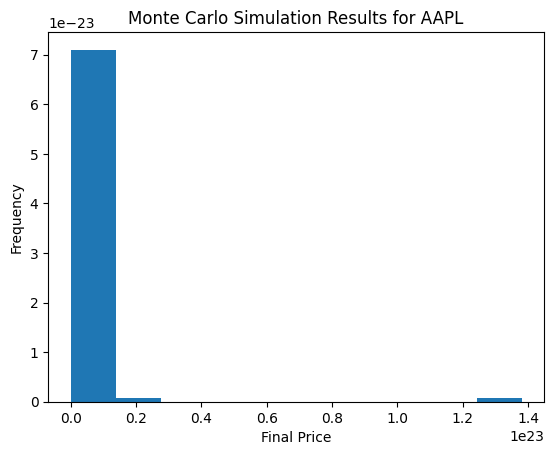

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# Download historical data as dataframe
df = pdr.get_data_yahoo("AAPL", start="2020-01-01", end="2022-12-31")

# Calculate the compound annual growth rate (CAGR)
days = (df.index[-1] - df.index[0]).days
cagr = ((((df['Adj Close'][-1]) / df['Adj Close'][1])) ** (365.0/days)) - 1

# Calculate the annual volatility of returns
df['Returns'] = df['Adj Close'].pct_change()
vol = df['Returns'].std()*np.sqrt(252)

# Define the Monte Carlo method
def monte_carlo(start_price, days, cagr, vol):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=0, scale=vol)
        drift[x] = cagr
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

# Run the Monte Carlo simulation 100 times
runs = 100
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_carlo(df['Adj Close'][-1], 252, cagr, vol)[251]

# Plot the results
plt.hist(simulations, bins=10, density=True)

# Add title and labels
plt.title('Monte Carlo Simulation Results for AAPL')
plt.xlabel('Final Price')
plt.ylabel('Frequency')

plt.show()